<a href="https://colab.research.google.com/github/kanthavelan/Product_Sales_forecasting/blob/main/Product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import ttest_ind
from scipy.stats import f_oneway,kruskal
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')

In [3]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [5]:
df.shape

(188340, 10)

In [6]:
test.shape

(22265, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [9]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [10]:
df.describe(include='object')

,ID,Store_Type,Location_Type,Region_Code,Date,Discount
count,188340,188340,188340,188340,188340,188340
unique,188340,4,5,4,516,2
top,T1188340,S1,L1,R1,2019-05-31,No
freq,1,88752,85140,63984,365,104051


In [11]:
df.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


In [12]:
test.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0


There is no null values.

In [13]:
df.duplicated().sum()

np.int64(0)

There is no duplicate values.

In [14]:
#copy the dataframe

dfp = df.copy()

In [15]:
dfp['Holiday'].value_counts()

,count
Holiday,
0,163520
1,24820


In [16]:
dfp['Holiday'] = dfp['Holiday'].replace({1: 'Yes', 0: 'No'})


In [17]:
#Conversion of data types

dfp['Date'] = pd.to_datetime(dfp['Date'])
dfp['Store_Type'] = dfp['Store_Type'].astype('category')
dfp['Location_Type'] = dfp['Location_Type'].astype('category')
dfp['Region_Code'] = dfp['Region_Code'].astype('category')
dfp['Discount'] = dfp['Discount'].astype('category')
dfp['Holiday'] = dfp['Holiday'].astype('category')
dfp.set_index('Date', inplace=True)

In [18]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188340 entries, 2018-01-01 to 2019-05-31
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   ID             188340 non-null  object  
 1   Store_id       188340 non-null  int64   
 2   Store_Type     188340 non-null  category
 3   Location_Type  188340 non-null  category
 4   Region_Code    188340 non-null  category
 5   Holiday        188340 non-null  category
 6   Discount       188340 non-null  category
 7   #Order         188340 non-null  int64   
 8   Sales          188340 non-null  float64 
dtypes: category(5), float64(1), int64(2), object(1)
memory usage: 8.1+ MB


In [19]:
num_col = dfp.select_dtypes(include=np.number).columns
num_col

Index(['Store_id', '#Order', 'Sales'], dtype='object')

In [20]:
cat_col = dfp.select_dtypes(include='category').columns
cat_col

Index(['Store_Type', 'Location_Type', 'Region_Code', 'Holiday', 'Discount'], dtype='object')

In [21]:
dfp['Location_Type'].value_counts()

,count
Location_Type,
L1,85140
L2,48504
L3,29928
L5,13932
L4,10836


Number of Unique values in Store_Type:  4
Unique values in Store_Type:  ['S1', 'S4', 'S3', 'S2']
Categories (4, object): ['S1', 'S2', 'S3', 'S4']
Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: count, dtype: int64


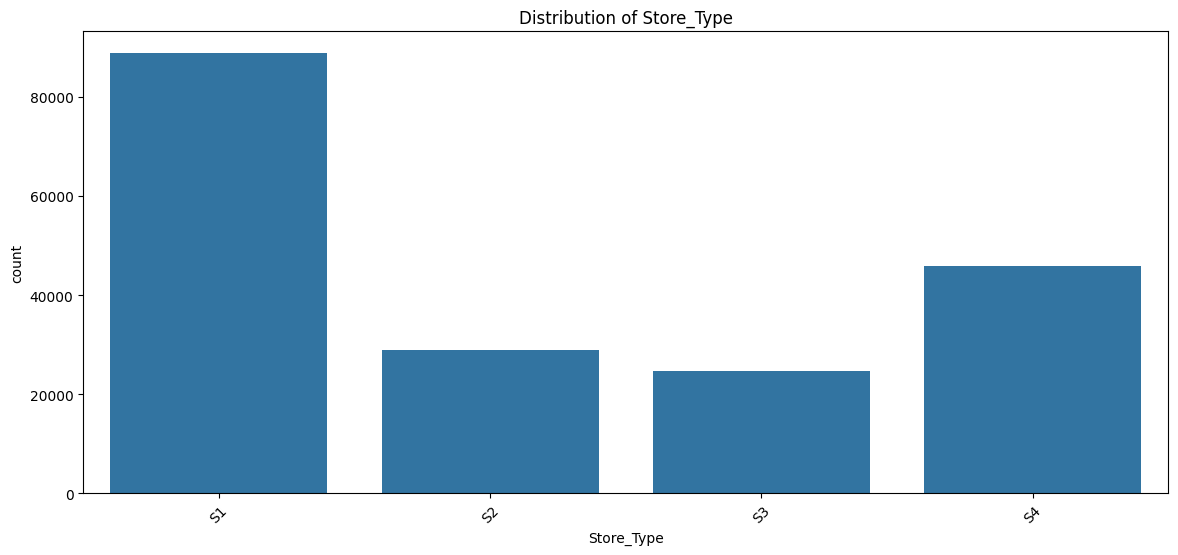

********************************************************************************************************************************************************************************************************
Number of Unique values in Location_Type:  5
Unique values in Location_Type:  ['L3', 'L2', 'L1', 'L5', 'L4']
Categories (5, object): ['L1', 'L2', 'L3', 'L4', 'L5']
Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64


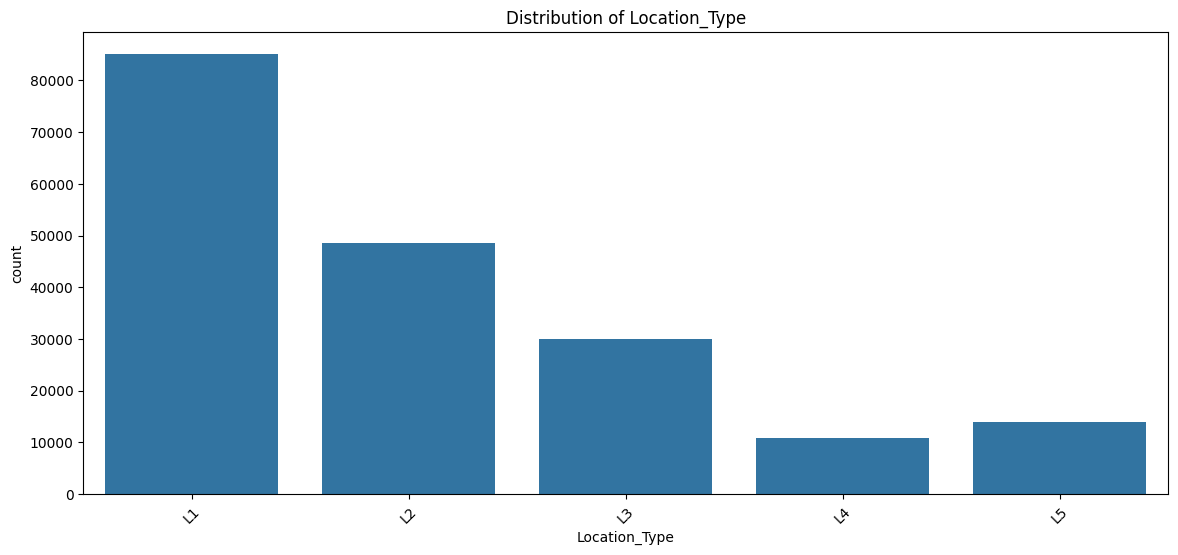

********************************************************************************************************************************************************************************************************
Number of Unique values in Region_Code:  4
Unique values in Region_Code:  ['R1', 'R4', 'R2', 'R3']
Categories (4, object): ['R1', 'R2', 'R3', 'R4']
Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: count, dtype: int64


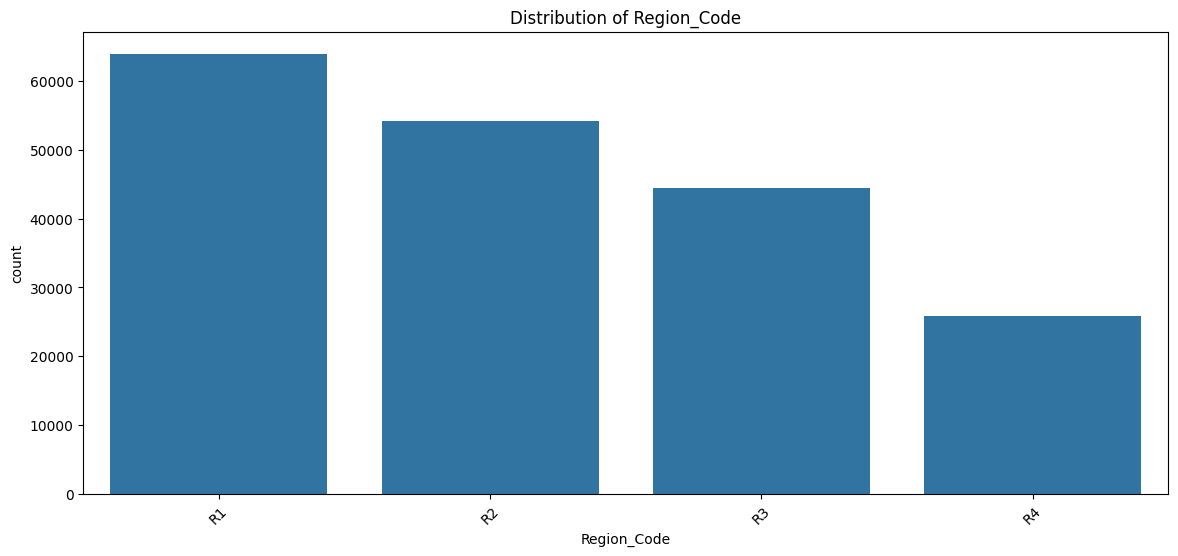

********************************************************************************************************************************************************************************************************
Number of Unique values in Holiday:  2
Unique values in Holiday:  ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Holiday
No     163520
Yes     24820
Name: count, dtype: int64


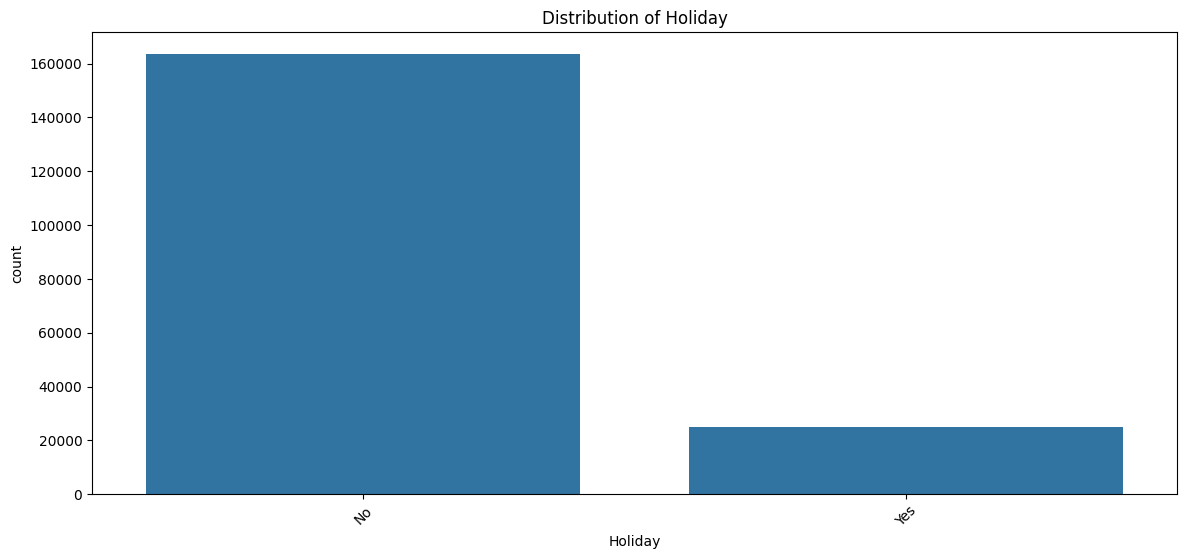

********************************************************************************************************************************************************************************************************
Number of Unique values in Discount:  2
Unique values in Discount:  ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Discount
No     104051
Yes     84289
Name: count, dtype: int64


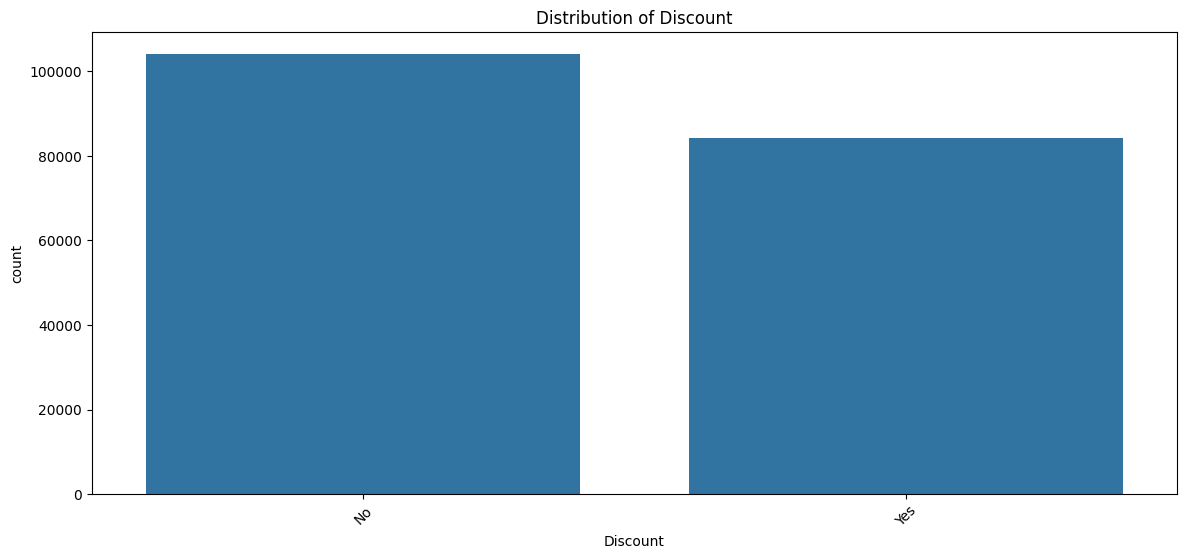

********************************************************************************************************************************************************************************************************


In [22]:
#Distribution for categorical columns
for col in cat_col:
    print(f'Number of Unique values in {col}: ',dfp[col].nunique())
    print(f'Unique values in {col}: ',dfp[col].unique())
    print(dfp[col].value_counts())
    plt.figure(figsize=(14, 6))
    sns.countplot(x=col, data=dfp)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
    print('*'*200)

# Distribution of data in category columns,

Store Type: Majority of entries are of type S1

Location Type: Most stores are in L1

Region Code: R1 is the most common region

Discount Status: Majority of records have 'No' discount

Holiday Status: Majority of records have 'No' Holiday

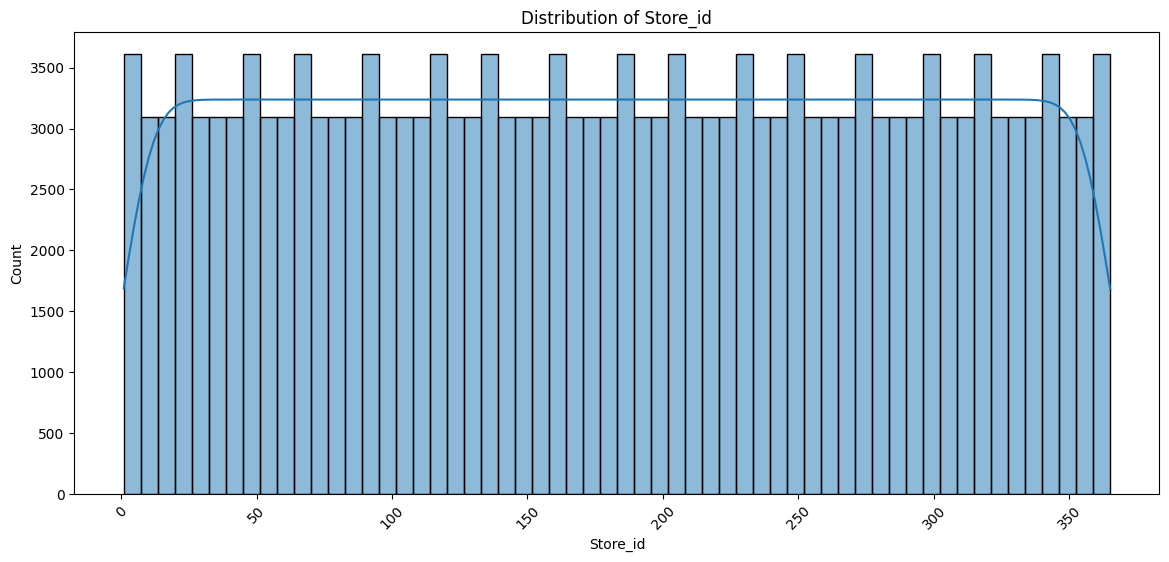

***********************************************************************************************************************************************************


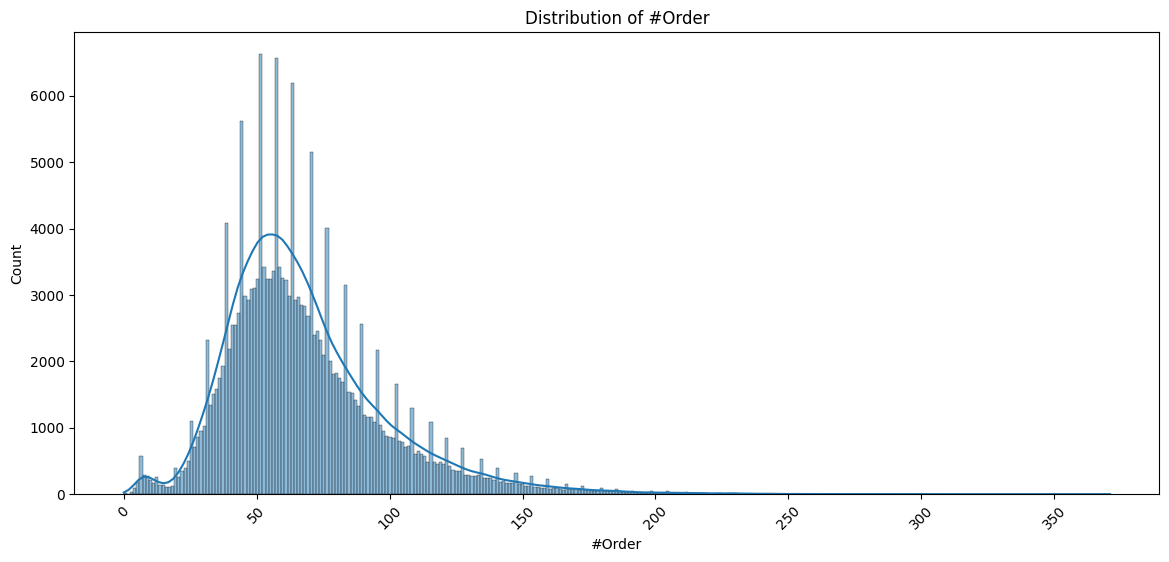

***********************************************************************************************************************************************************


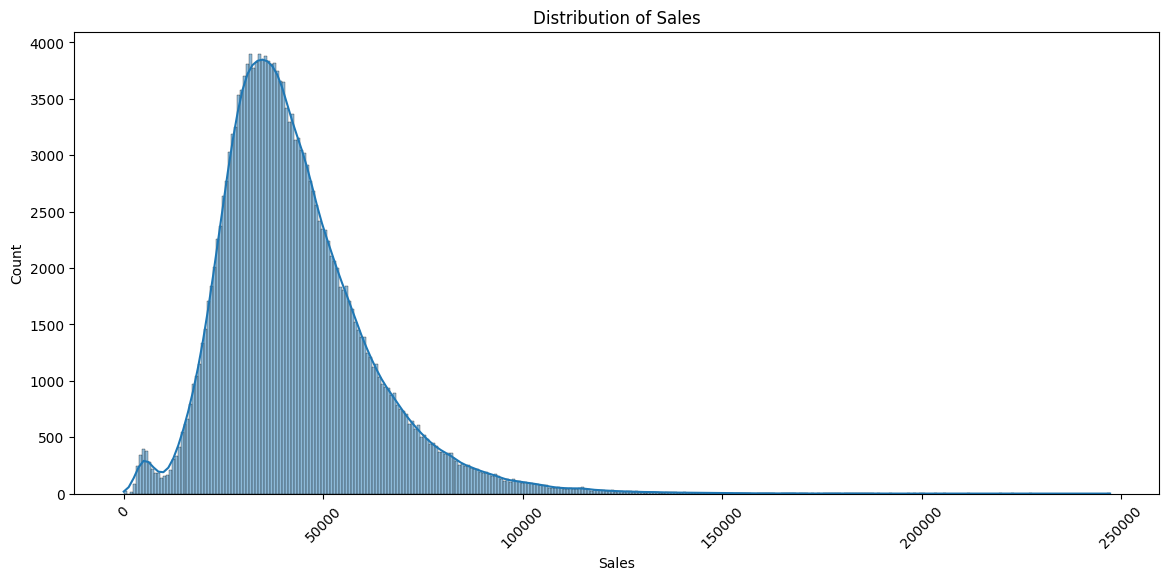

***********************************************************************************************************************************************************


In [23]:
#Distribution of Numerical columns
for col in num_col:
    plt.figure(figsize=(14, 6))
    sns.histplot(x=col,data=dfp,kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
    print('*'*155)

The distributions of sales and orders appear to be left-skewed.

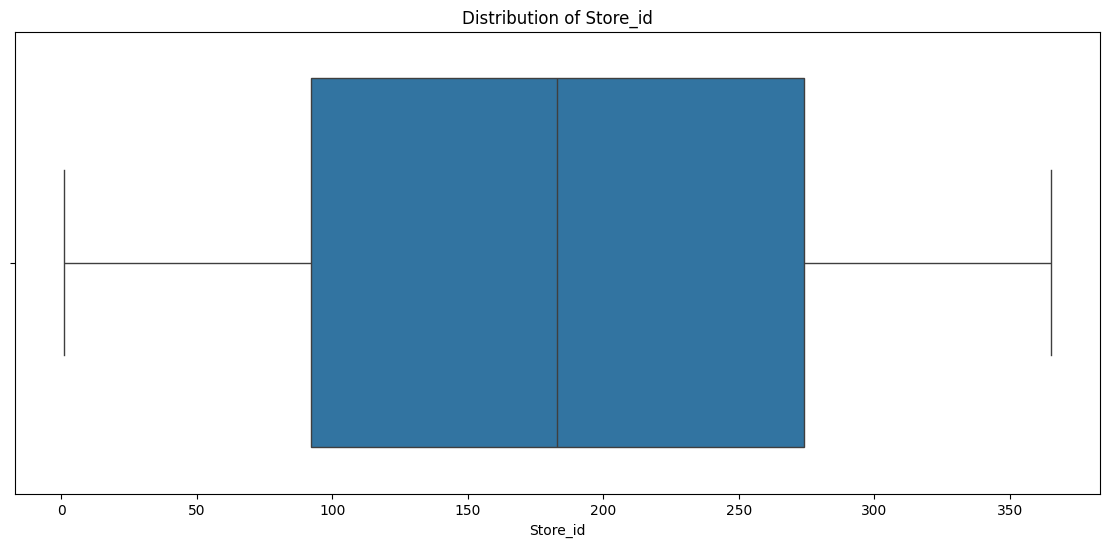

***********************************************************************************************************************************************************


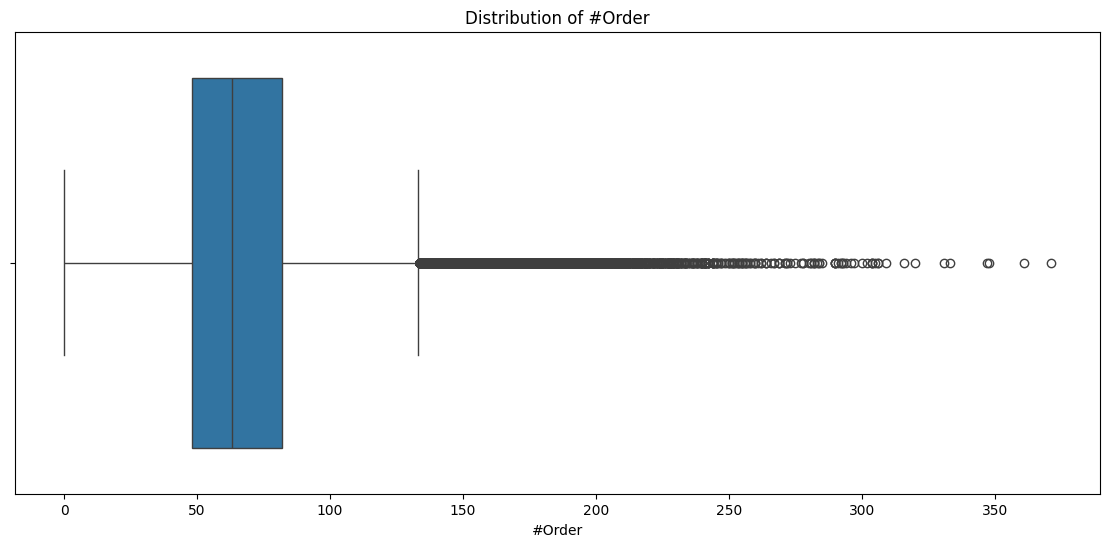

***********************************************************************************************************************************************************


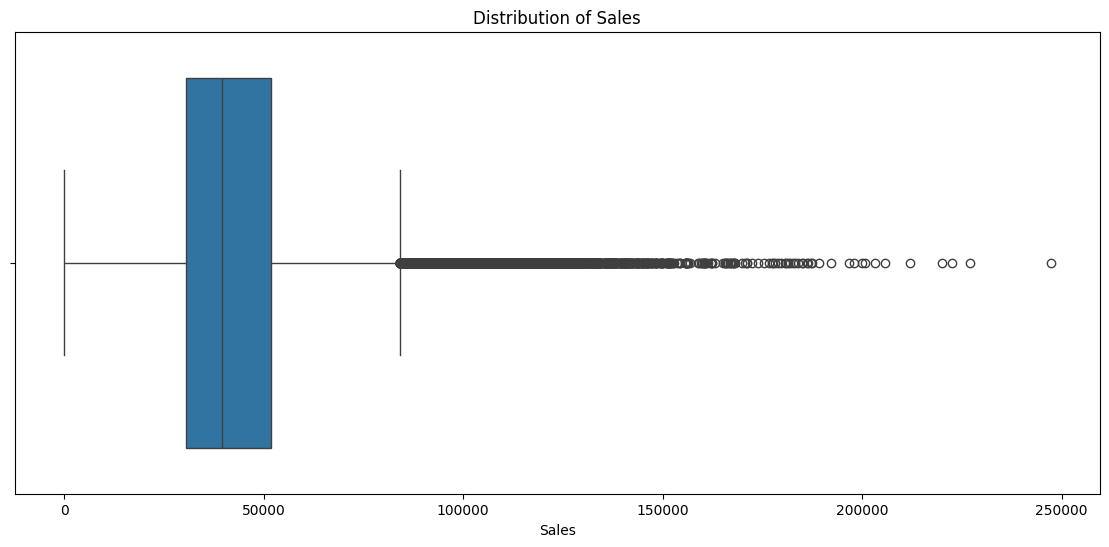

***********************************************************************************************************************************************************


In [24]:
#Handling the Outlier
for col in num_col:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=col,data=dfp)
    plt.title(f'Distribution of {col}')
    plt.show()
    print('*'*155)

In [25]:
dfp.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales
Date,,,,,,,,,
2018-01-01,T1000001,1,S1,L3,R1,Yes,Yes,9,7011.84
2018-01-01,T1000002,253,S4,L2,R1,Yes,Yes,60,51789.12
2018-01-01,T1000003,252,S3,L2,R1,Yes,Yes,42,36868.20
2018-01-01,T1000004,251,S2,L3,R1,Yes,Yes,23,19715.16
2018-01-01,T1000005,250,S2,L3,R4,Yes,Yes,62,45614.52


In [26]:
dfp['Month'] = dfp.index.month_name()
dfp['Month_Name'] = dfp.index.month_name()
dfp['Year'] = dfp.index.year
dfp['Quarter'] = dfp.index.quarter
dfp['Day'] = dfp.index.day
dfp['Day_of_week'] = dfp.index.dayofweek

In [27]:
dfp['Quarter_Label'] = 'Q' + dfp['Quarter'].astype(str)

In [28]:
dfp['Month_Year_dt'] = dfp.index.to_period('M').to_timestamp()
dfp['Month_Year'] = dfp.index.strftime('%b %Y')

In [29]:
#Renaming #Order to No_of_order
dfp = dfp.rename(columns={'#Order': 'No_of_orders'})

In [30]:
dfp.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,No_of_orders,Sales,Month,Month_Name,Year,Quarter,Day,Day_of_week,Quarter_Label,Month_Year_dt,Month_Year
Date,,,,,,,,,,,,,,,,,,
2018-01-01,T1000001,1,S1,L3,R1,Yes,Yes,9,7011.84,January,January,2018,1,1,0,Q1,2018-01-01,Jan 2018
2018-01-01,T1000002,253,S4,L2,R1,Yes,Yes,60,51789.12,January,January,2018,1,1,0,Q1,2018-01-01,Jan 2018
2018-01-01,T1000003,252,S3,L2,R1,Yes,Yes,42,36868.20,January,January,2018,1,1,0,Q1,2018-01-01,Jan 2018
2018-01-01,T1000004,251,S2,L3,R1,Yes,Yes,23,19715.16,January,January,2018,1,1,0,Q1,2018-01-01,Jan 2018
2018-01-01,T1000005,250,S2,L3,R4,Yes,Yes,62,45614.52,January,January,2018,1,1,0,Q1,2018-01-01,Jan 2018


In [31]:
def month_order_fun(data,col):
  month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

  data[col] = pd.Categorical(
    data[col], categories=month_order, ordered=True)

  data = data.sort_values(col)

  return data

In [32]:
#Total Sales per month
sales_summary = dfp.groupby('Month_Year')['Sales'].sum().reset_index(name='Total_monthly_Sales')

month_order = (
    dfp[['Month_Year', 'Month_Year_dt']]
    .drop_duplicates()
    .sort_values('Month_Year_dt')
)['Month_Year']

sales_summary['Month_Year'] = pd.Categorical(sales_summary['Month_Year'], categories=month_order, ordered=True)
sales_summary = sales_summary.sort_values('Month_Year')
sales_summary

,Month_Year,Total_monthly_Sales
6,Jan 2018,5.066658e+08
4,Feb 2018,4.175890e+08
10,Mar 2018,4.718072e+08
0,Apr 2018,4.525465e+08
12,May 2018,5.177403e+08
9,Jun 2018,4.895277e+08
8,Jul 2018,5.271139e+08
2,Aug 2018,4.528305e+08
16,Sep 2018,4.502989e+08
15,Oct 2018,4.411538e+08


In [33]:
fig = px.bar(sales_summary, x='Month_Year', y='Total_monthly_Sales', title='Total sales per month')
fig.show()

In 2018, the months with the highest sales were January, May, July, and December.

In 2019, among the five months of available data, January and May recorded the highest sales.

In [34]:
#Total_No_of_orders per month
No_of_orders_summary = dfp.groupby('Month_Year')['No_of_orders'].sum().reset_index(name='Total_No_of_orders')

month_order = (
    dfp[['Month_Year', 'Month_Year_dt']]
    .drop_duplicates()
    .sort_values('Month_Year_dt')
)['Month_Year']

No_of_orders_summary['Month_Year'] = pd.Categorical(No_of_orders_summary['Month_Year'], categories=month_order, ordered=True)
No_of_orders_summary = No_of_orders_summary.sort_values('Month_Year')
No_of_orders_summary

,Month_Year,Total_No_of_orders
6,Jan 2018,739697
4,Feb 2018,687778
10,Mar 2018,773622
0,Apr 2018,745863
12,May 2018,763965
9,Jun 2018,724607
8,Jul 2018,860493
2,Aug 2018,759559
16,Sep 2018,750184
15,Oct 2018,740680


In [35]:
fig = px.bar(No_of_orders_summary, x='Month_Year', y='Total_No_of_orders', title='Total No. of orders per month')
fig.show()

In 2018, the months with the highest total no of orders were July and December.

In 2019, among the five months of available data, January and May recorded the highest total no of orders.

In [36]:
#Top 5 month sales comparison between 2018 and 2019
months_2019 = dfp[dfp['Year'] == 2019]['Month'].unique()


top_5monthly_sales = dfp[dfp['Year'].isin([2018, 2019]) & dfp['Month'].isin(months_2019)]
monthly_sales_summary = top_5monthly_sales.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May']
monthly_sales_summary['Month'] = pd.Categorical(monthly_sales_summary['Month'], categories=month_order, ordered=True)
monthly_sales_summary = monthly_sales_summary.sort_values('Month')
monthly_sales_summary

,Year,Month,Sales
2,2018,January,5.066658e+08
7,2019,January,5.112123e+08
1,2018,February,4.175890e+08
6,2019,February,4.086847e+08
3,2018,March,4.718072e+08
8,2019,March,4.555606e+08
0,2018,April,4.525465e+08
5,2019,April,4.403971e+08
4,2018,May,5.177403e+08
9,2019,May,5.711210e+08


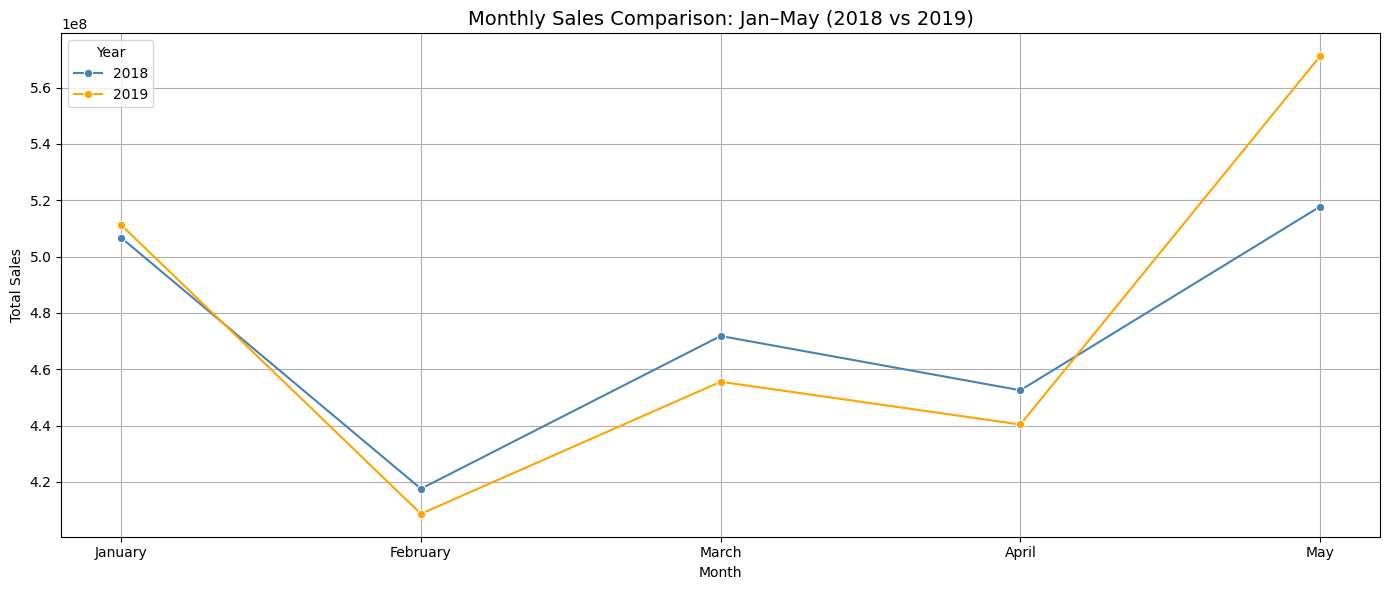

In [37]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales_summary, x='Month', y='Sales', hue='Year', marker='o',palette={2018: 'steelblue', 2019: 'orange'})

plt.title('Monthly Sales Comparison: Jan–May (2018 vs 2019)', fontsize=14)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
#Top 5 month orders comparison between 2018 and 2019
top_5monthly_orders = dfp[dfp['Year'].isin([2018, 2019]) & dfp['Month'].isin(months_2019)]
monthly_order_summary = top_5monthly_orders.groupby(['Year', 'Month'])['No_of_orders'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May']
monthly_order_summary['Month'] = pd.Categorical(monthly_order_summary['Month'], categories=month_order, ordered=True)
monthly_order_summary = monthly_order_summary.sort_values('Month')
monthly_order_summary

,Year,Month,No_of_orders
2,2018,January,739697
7,2019,January,775012
1,2018,February,687778
6,2019,February,690971
3,2018,March,773622
8,2019,March,759825
0,2018,April,745863
5,2019,April,748001
4,2018,May,763965
9,2019,May,845029


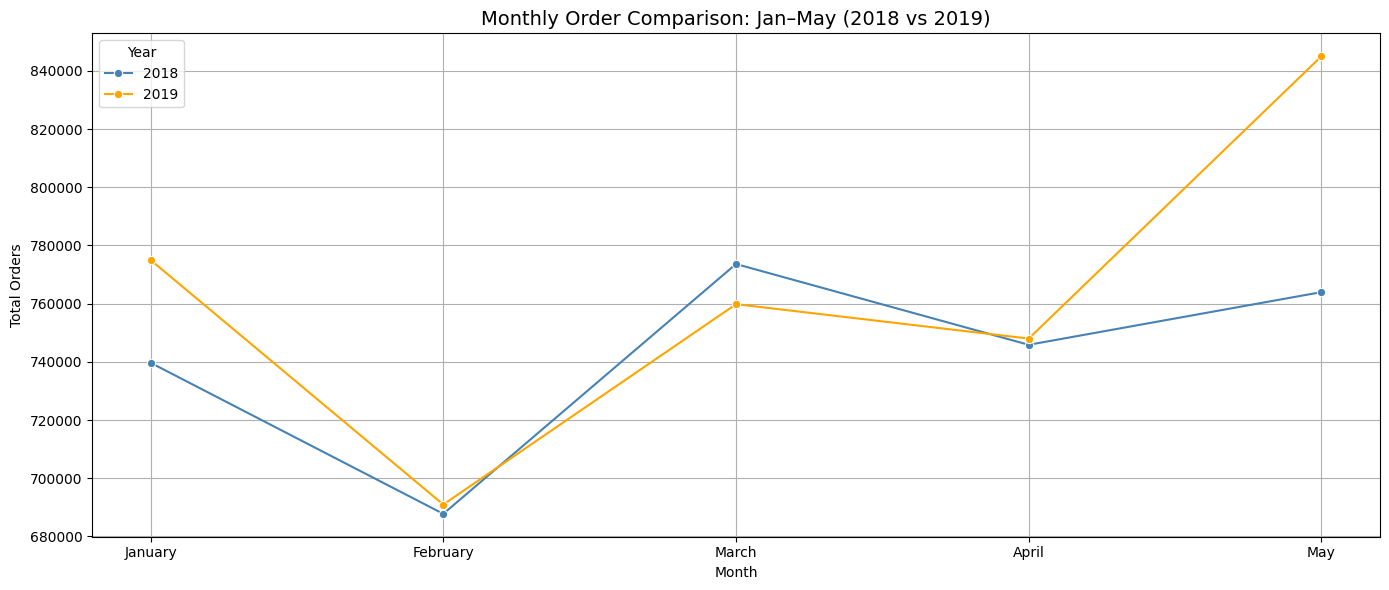

In [39]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_order_summary, x='Month', y='No_of_orders', hue='Year', marker='o',palette={2018: 'steelblue', 2019: 'orange'})

plt.title('Monthly Order Comparison: Jan–May (2018 vs 2019)', fontsize=14)
plt.ylabel('Total Orders')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

#Monthly Sales Comparison: Jan–May (2018 vs 2019)

There is a noticeable decline in sales during February, March, and April when compared to the higher sales observed in January and May.

May 2019 recorded higher sales compared to May 2018.

In [40]:
#Monthly Sales Trend 2018
Yearly_sales_2018 = dfp[dfp['Year'] == 2018]
Yearly_sales_2018 = Yearly_sales_2018.groupby('Month')['Sales'].sum().reset_index(name='Total_Sales_2018')
Yearly_sales_2018 = month_order_fun(Yearly_sales_2018,'Month')
Yearly_sales_2018

,Month,Total_Sales_2018
4,January,5.066658e+08
3,February,4.175890e+08
7,March,4.718072e+08
0,April,4.525465e+08
8,May,5.177403e+08
6,June,4.895277e+08
5,July,5.271139e+08
1,August,4.528305e+08
11,September,4.502989e+08
10,October,4.411538e+08


In [41]:
fig = px.line(Yearly_sales_2018, x='Month', y='Total_Sales_2018', title='Monthly Sales Trend 2018', markers=True)
fig.show()

In [42]:
#Monthly Orders Trend
Yearly_orders_2018 = dfp[dfp['Year'] == 2018]
Yearly_orders_2018 = Yearly_orders_2018.groupby('Month')['No_of_orders'].sum().reset_index(name='Total_Ordes_2018')
Yearly_orders_2018 = month_order_fun(Yearly_orders_2018,'Month')
Yearly_orders_2018

,Month,Total_Ordes_2018
4,January,739697
3,February,687778
7,March,773622
0,April,745863
8,May,763965
6,June,724607
5,July,860493
1,August,759559
11,September,750184
10,October,740680


In [43]:
fig = px.line(Yearly_orders_2018, x='Month', y='Total_Ordes_2018', title='Monthly Orders Trend 2018', markers=True)
fig.show()

#Monthly Sales Comparison 2018 vs 2019

1) The sales trend appears fluctuating rather than steadily increasing or decreasing.

2) High Sales Months:

January, May, July, December

These months show noticeable spikes, indicating seasonal peaks — possibly due to holidays, or discount.

3) Low Sales Months:

February, October, November

These months consistently show lower performance, hinting at possible seasonal dips.

4) Sudden Drop in November after decent performance in October suggests an anomaly or external factor.

5) Sharp Increase in December may indicate a holiday-driven boost.

6) High total no.of Orders Months:

January, March, May, July, December

7) Low total no.of Orders Months:

February, June, October, November



In [44]:
Yearly_sales_2019 = dfp[dfp['Year'] == 2019]
Yearly_sales_2019 = Yearly_sales_2019.groupby('Month')['Sales'].sum().reset_index(name='Yearly_Total_Sales')

month_order = ['January', 'February', 'March', 'April', 'May']
Yearly_sales_2019['Month'] = pd.Categorical(Yearly_sales_2019['Month'], categories=month_order, ordered=True)
Yearly_sales_2019 = Yearly_sales_2019.sort_values('Month')

Yearly_sales_2019

,Month,Yearly_Total_Sales
2,January,5.112123e+08
1,February,4.086847e+08
3,March,4.555606e+08
0,April,4.403971e+08
4,May,5.711210e+08


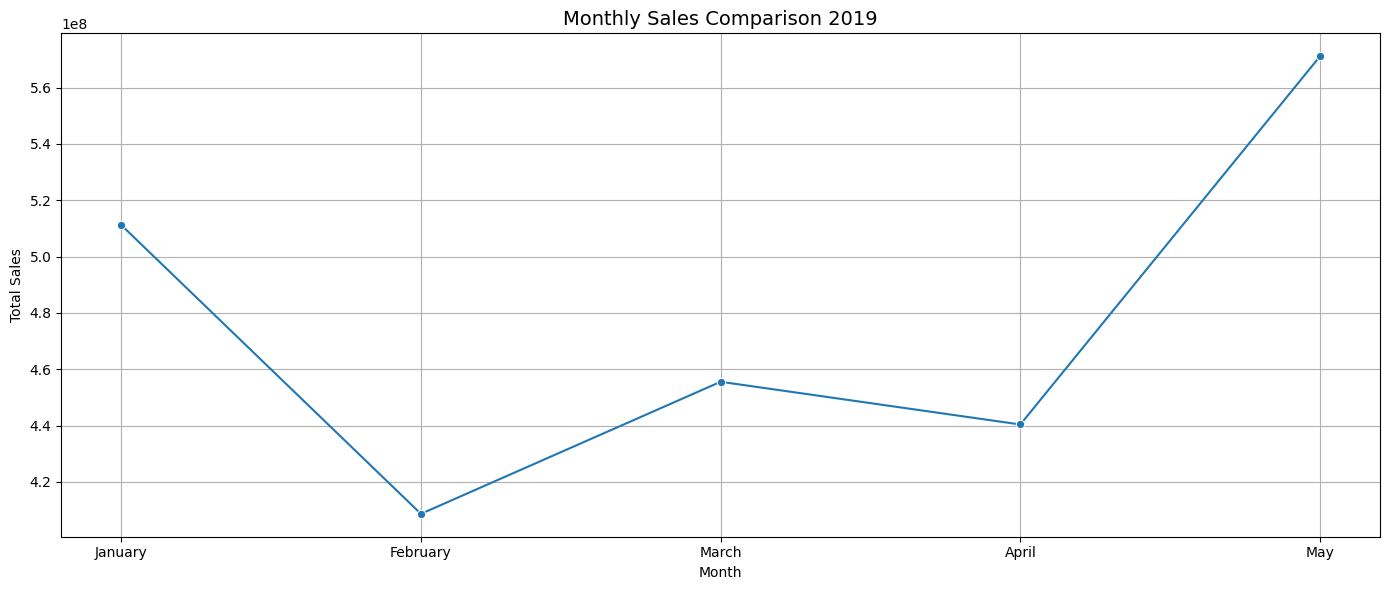

In [45]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=Yearly_sales_2019, x='Month', y='Yearly_Total_Sales', marker='o',palette={2018: 'steelblue'})

plt.title('Monthly Sales Comparison 2019', fontsize=14)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

#Monthly Sales Comparison 2018 vs 2019

Trend: Fluctuating pattern; no consistent upward or downward movement.

Seasonality: May shows a potential seasonal high; February may be seasonally low.

Residuals: Sharp fall in Feb and rise in May may need further analysis.

In [46]:
dfp.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code',
       'Holiday', 'Discount', 'No_of_orders', 'Sales', 'Month', 'Month_Name',
       'Year', 'Quarter', 'Day', 'Day_of_week', 'Quarter_Label',
       'Month_Year_dt', 'Month_Year'],
      dtype='object')

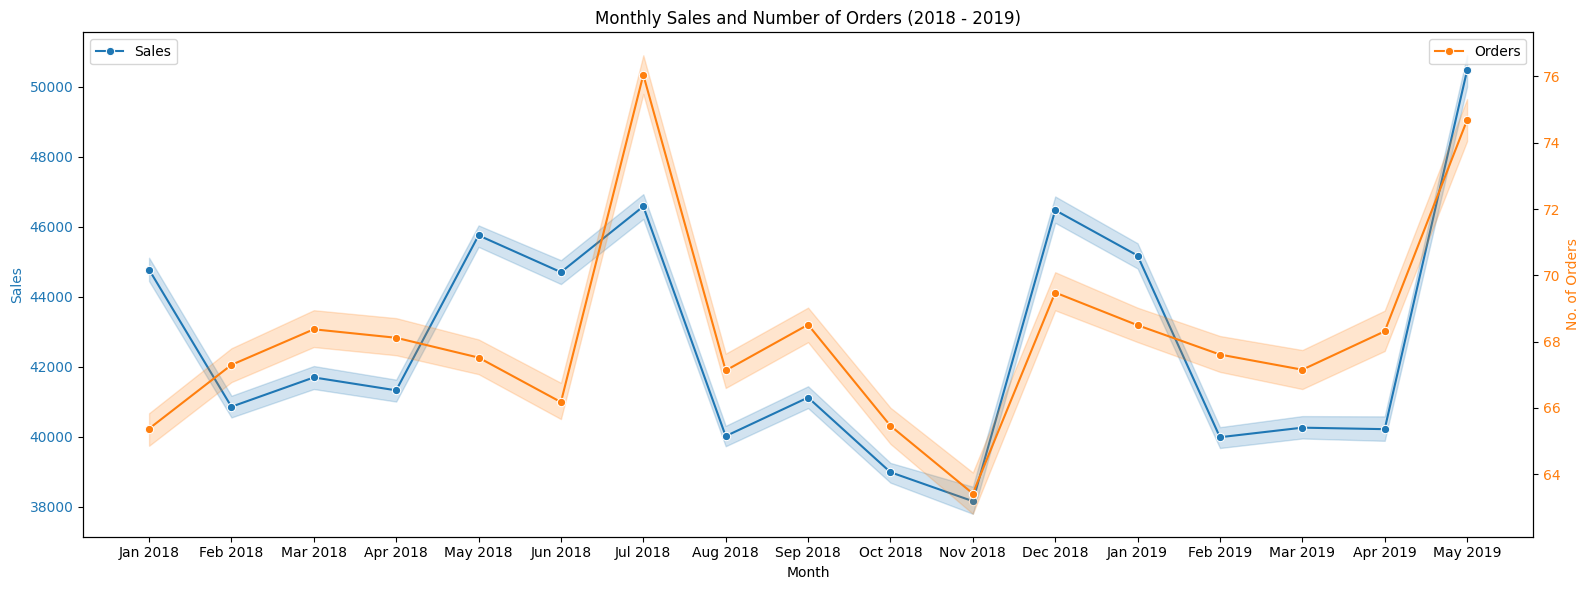

In [47]:
# Monthly sales vs order (2018 - 2019)
dfp = dfp.sort_values('Month_Year_dt')

fig, ax1 = plt.subplots(figsize=(16, 6))


color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales', color=color)
sns.lineplot(data=dfp, x='Month_Year', y='Sales', ax=ax1, label='Sales', color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('No. of Orders', color=color)
sns.lineplot(data=dfp, x='Month_Year', y='No_of_orders', ax=ax2, label='Orders', color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Sales and Number of Orders (2018 - 2019)')
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()




In [48]:
#Discount vs Monthly Distribution
discount_summary = dfp.groupby(['Month_Year', 'Discount']).size().reset_index(name='Count')


month_order = (
    dfp[['Month_Year', 'Month_Year_dt']]
    .drop_duplicates()
    .sort_values('Month_Year_dt')
)['Month_Year']
discount_summary['Month_Year'] = pd.Categorical(discount_summary['Month_Year'], categories=month_order, ordered=True)
discount_summary = discount_summary.sort_values('Month_Year')


fig = px.bar(
    discount_summary,
    x='Month_Year',
    y='Count',
    color='Discount',
    barmode='stack',
    text='Count',
    color_discrete_map={'Yes': 'mediumseagreen', 'No': 'salmon'}
)

fig.update_layout(
    title='Monthly Discount Status (Jan 2018 – May 2019)',
    xaxis_title='Month',
    yaxis_title='Number of Orders',
    legend_title='Discount',
    xaxis_tickangle=45,
    height=500
)

fig.update_traces(textposition='inside')

fig.show()


In [49]:
dfp.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,No_of_orders,Sales,Month,Month_Name,Year,Quarter,Day,Day_of_week,Quarter_Label,Month_Year_dt,Month_Year
Date,,,,,,,,,,,,,,,,,,
2018-01-01,T1000001,1,S1,L3,R1,Yes,Yes,9,7011.84,January,January,2018,1,1,0,Q1,2018-01-01,Jan 2018
2018-01-21,T1007540,217,S4,L1,R1,No,No,74,40557.00,January,January,2018,1,21,6,Q1,2018-01-01,Jan 2018
2018-01-21,T1007541,257,S1,L3,R1,No,No,51,27765.00,January,January,2018,1,21,6,Q1,2018-01-01,Jan 2018
2018-01-21,T1007542,288,S3,L2,R3,No,No,84,52944.00,January,January,2018,1,21,6,Q1,2018-01-01,Jan 2018
2018-01-21,T1007543,64,S3,L1,R2,No,No,71,41241.00,January,January,2018,1,21,6,Q1,2018-01-01,Jan 2018


In [50]:
holiday_summary = dfp.groupby(['Month_Year', 'Holiday']).size().reset_index(name='Count')


month_order = (
    dfp[['Month_Year', 'Month_Year_dt']]
    .drop_duplicates()
    .sort_values('Month_Year_dt')
)['Month_Year']

holiday_summary['Month_Year'] = pd.Categorical(holiday_summary['Month_Year'], categories=month_order, ordered=True)
holiday_summary = holiday_summary.sort_values('Month_Year')


fig = px.bar(
    holiday_summary,
    x='Month_Year',
    y='Count',
    color='Holiday',
    barmode='stack',
    text='Count',
    color_discrete_map={'Yes': 'mediumseagreen', 'No': 'salmon'}
)

fig.update_layout(
    title='Monthly Holiday Status (Jan 2018 – May 2019)',
    xaxis_title='Month',
    yaxis_title='Number of Orders',
    legend_title='Holiday',
    xaxis_tickangle=45,
    height=500
)

fig.update_traces(textposition='inside')

fig.show()


In [51]:
#Total Orders by Discount Status
Orders_discount = dfp.groupby('Discount')['No_of_orders'].sum().reset_index(name='Total_Orders')
Orders_discount

,Discount,Total_Orders
0,No,6430992
1,Yes,6414868


In [52]:
#Total Orders by Discount Status
fig = px.bar(Orders_discount, x='Discount', y='Total_Orders', text='Total_Orders',
             title='Total Orders by Discount Status',
             labels={'Total_Orders': 'Total orders'},
             color='Discount')

fig.update_traces(textposition='outside')
fig.show()

In [53]:
#Total Orders by Discount Status
Orders_in_holiday = dfp.groupby('Holiday')['No_of_orders'].sum().reset_index(name='Total_Orders')
Orders_in_holiday

,Holiday,Total_Orders
0,No,11425695
1,Yes,1420165


In [54]:
fig = px.bar(Orders_in_holiday, x='Holiday', y='Total_Orders', text='Total_Orders',
             title='Total Orders by Holiday Status',
             labels={'Total_Orders': 'Total Orders'},
             color='Holiday')

fig.update_traces(textposition='outside')
fig.show()

In [55]:
#Total Sales by Discount Status
Sales_discount = dfp.groupby('Discount')['Sales'].sum().reset_index(name='Total_Sales')
Sales_discount

,Discount,Total_Sales
0,No,3.891890e+09
1,Yes,4.166110e+09


In [56]:
# Convert to numeric and scale to billions
Sales_discount['Total_Sales'] = Sales_discount['Total_Sales'].astype(str).str.replace(',', '')
Sales_discount['Total_Sales'] = Sales_discount['Total_Sales'].astype(float) / 1_000_000_000
Sales_discount['Total_Sales'] = Sales_discount['Total_Sales'].round(2)


fig = px.bar(Sales_discount, x='Discount', y='Total_Sales', text='Total_Sales',
             title='Total Sales by Discount Status (in Billions)',
             labels={'Total_Sales': 'Total Sales (Billions)'},
             color='Discount')

fig.update_traces(textposition='outside')
fig.show()

The highest total sales occurred when a discount was given, indicating a positive impact of discounting on overall sales.

In [57]:
#Total Sales by Holiday Status
Sales_in_holiday = dfp.groupby('Holiday')['Sales'].sum().reset_index(name='Total_Sales_in_holiday')
Sales_in_holiday

,Holiday,Total_Sales_in_holiday
0,No,7.178085e+09
1,Yes,8.799156e+08


In [58]:
# Convert to numeric and scale to billions
Sales_in_holiday['Total_Sales_in_holiday'] = Sales_in_holiday['Total_Sales_in_holiday'].astype(str).str.replace(',', '')
Sales_in_holiday['Total_Sales_in_holiday'] = Sales_in_holiday['Total_Sales_in_holiday'].astype(float) / 1_000_000_000
Sales_in_holiday['Total_Sales_in_holiday'] = Sales_in_holiday['Total_Sales_in_holiday'].round(2)


fig = px.bar(Sales_in_holiday, x='Holiday', y='Total_Sales_in_holiday', text='Total_Sales_in_holiday',
             title='Total Sales by Holiday Status (in Billions)',
             labels={'Total_Sales': 'Total Sales (Billions)'},
             color='Holiday')

fig.update_traces(textposition='outside')
fig.show()

The highest sales occurred during the non-holiday season.

In [59]:
def distribution_of_sales(data,col):


  data = dfp.groupby(col)['Sales'].sum().reset_index(name='Total_Sales')
  data['Total_Sales'] = data['Total_Sales'] / 1_000_000_000
  data['Total_Sales'] = data['Total_Sales'].round(2)
  print(data)
  print()

  fig = px.bar(data, x=col, y='Total_Sales', text='Total_Sales',
             title=f'{col} Sales (in Billions)',
             labels={'Sales': 'Sales (Billions USD)'})

  fig.update_traces(textposition='outside')
  fig.update_layout(yaxis_tickformat=',.2f')
  fig.show()

In [60]:
distribution_of_sales(dfp,'Store_Type')

  Store_Type  Total_Sales
0         S1         3.34
1         S2         0.80
2         S3         1.17
3         S4         2.75



In [61]:
distribution_of_sales(dfp,'Location_Type')

  Location_Type  Total_Sales
0            L1         3.53
1            L2         2.87
2            L3         0.99
3            L4         0.31
4            L5         0.35



In [62]:
distribution_of_sales(dfp,'Region_Code')

  Region_Code  Total_Sales
0          R1         2.99
1          R2         2.17
2          R3         1.87
3          R4         1.03



The highest sales were recorded in Store Type S1, Region R1, and Location Type L1.

The lowest sales were observed in Store Type S2, Region R4, and Location Type L4.

In [63]:
def distribution_of_orders(data,col):


  data = dfp.groupby(col)['No_of_orders'].sum().reset_index(name='Total_Orders')
  print(data)
  print()

  fig = px.bar(data, x=col, y='Total_Orders', text='Total_Orders',
             title=f'{col} Orders',
             labels={'Orders': 'Orders '})

  fig.update_traces(textposition='outside')
  fig.update_layout(yaxis_tickformat=',.2f')
  fig.show()

In [64]:
distribution_of_orders(dfp,'Store_Type')

  Store_Type  Total_Orders
0         S1       5149577
1         S2       1169502
2         S3       1824495
3         S4       4702286



In [65]:
distribution_of_orders(dfp,'Location_Type')

  Location_Type  Total_Orders
0            L1       5556742
1            L2       4600675
2            L3       1590881
3            L4        513475
4            L5        584087



In [66]:
distribution_of_orders(dfp,'Region_Code')

  Region_Code  Total_Orders
0          R1       5094794
1          R2       3402429
2          R3       2834847
3          R4       1513790



The highest orders were recorded in Store Type S1, Region R1, and Location Type L1.

The lowest orders were observed in Store Type S2, Region R4, and Location Type L4.

Higher sales are associated with a greater number of orders in specific stores, regions, and locations.

In [67]:
# Store Type vs Discount Status

def discount_status(data,col):
  plt.figure(figsize=(12, 6))
  sns.countplot(data=dfp, x=col, hue='Discount')
  plt.title(f'{col} vs Discount Status')
  plt.show()

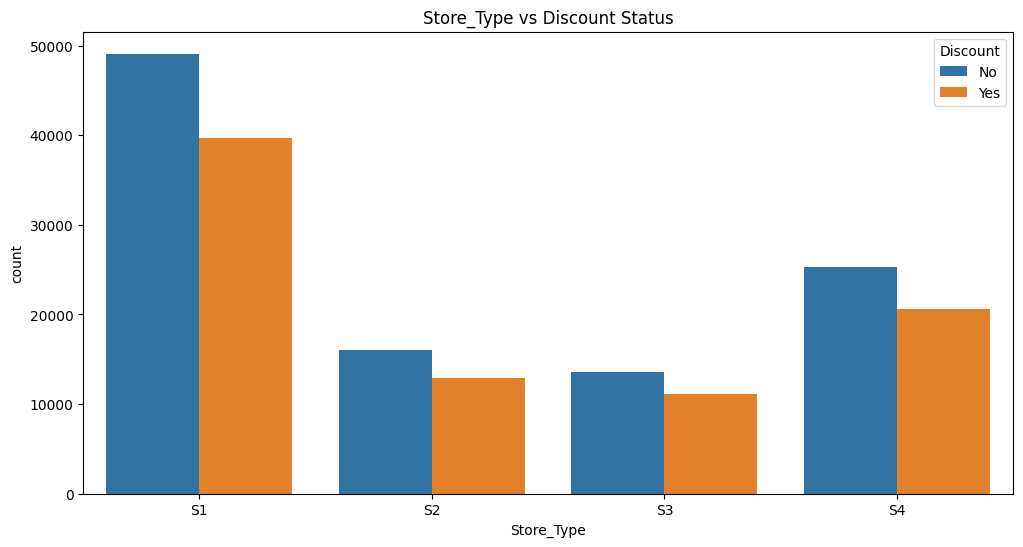

In [68]:
discount_status(dfp,'Store_Type')

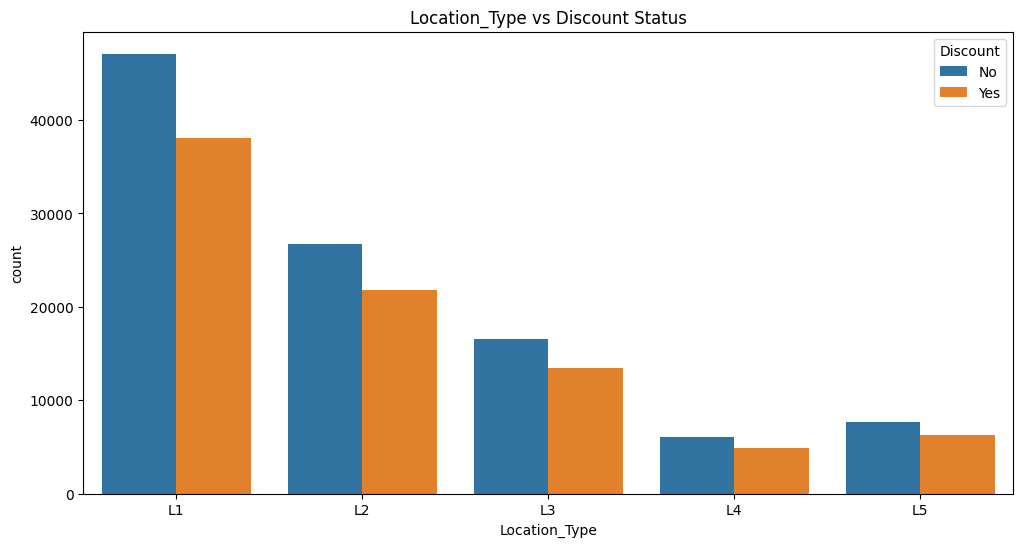

In [69]:
discount_status(dfp,'Location_Type')

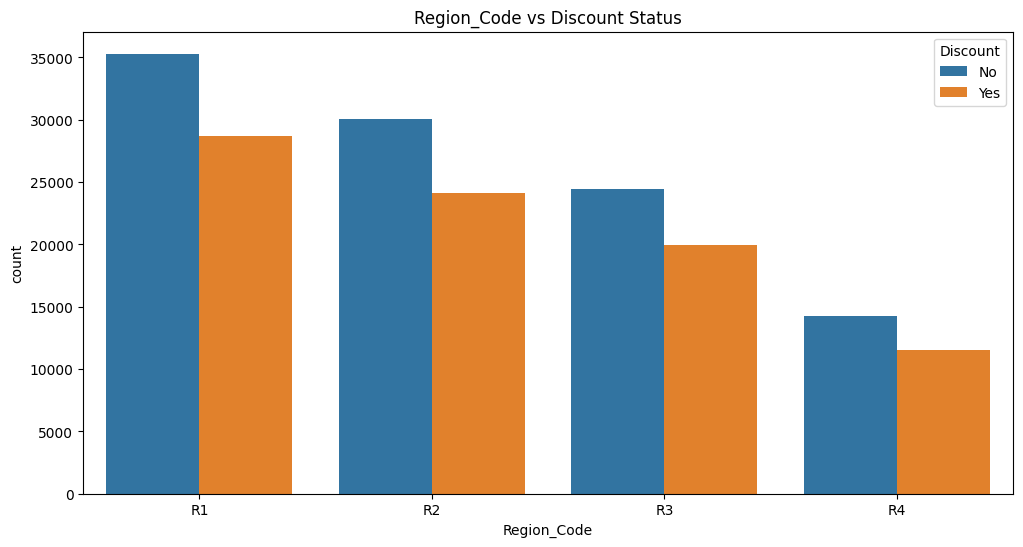

In [70]:
discount_status(dfp,'Region_Code')

In [71]:
def holiday_status(data,col):
  plt.figure(figsize=(12, 6))
  sns.countplot(data=dfp, x=col, hue='Holiday')
  plt.title(f'{col} vs Holiday Status')
  plt.show()

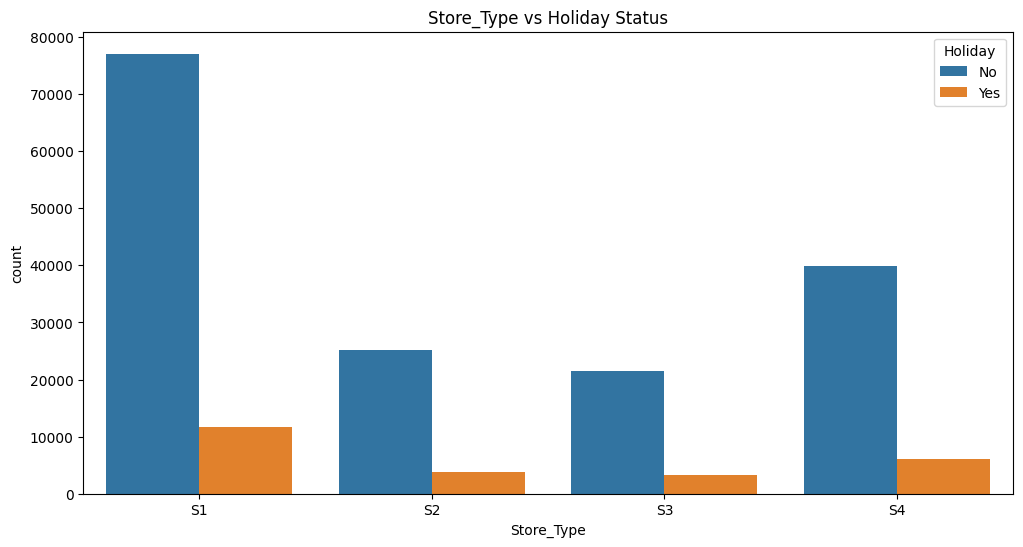

In [72]:
holiday_status(dfp,'Store_Type')

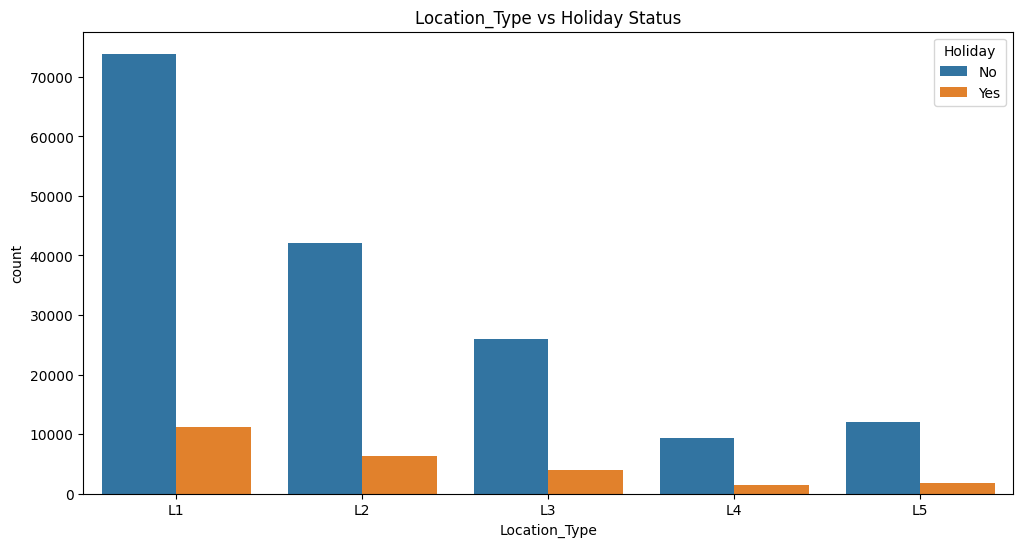

In [73]:
holiday_status(dfp,'Location_Type')

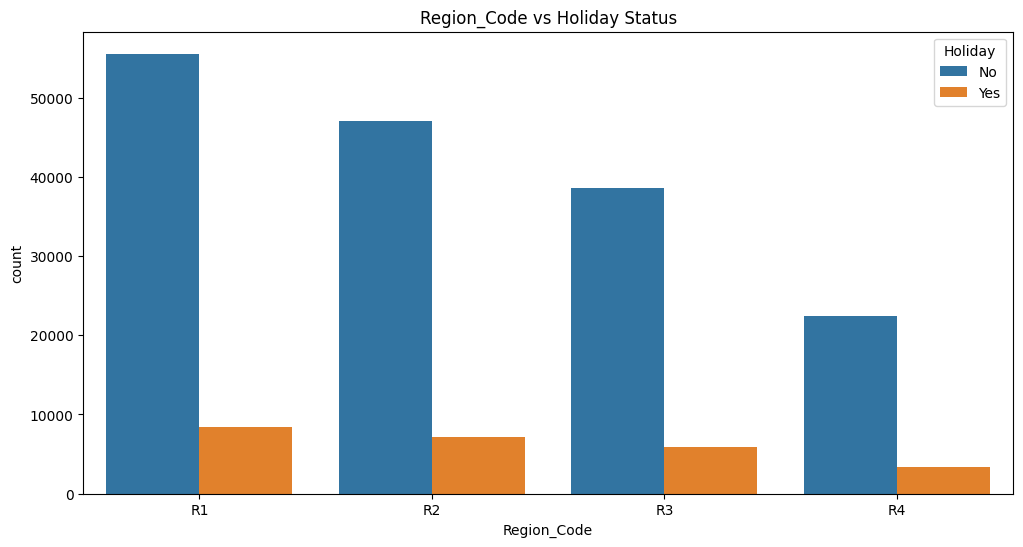

In [74]:
holiday_status(dfp,'Region_Code')

In [75]:
num_df = df.select_dtypes(include='number')
corr_matrix = num_df.corr()
print(corr_matrix)

              Store_id       Holiday    #Order     Sales
Store_id  1.000000e+00  5.380970e-16  0.028290  0.004377
Holiday   5.380970e-16  1.000000e+00 -0.140496 -0.154779
#Order    2.828985e-02 -1.404963e-01  1.000000  0.941601
Sales     4.376631e-03 -1.547788e-01  0.941601  1.000000


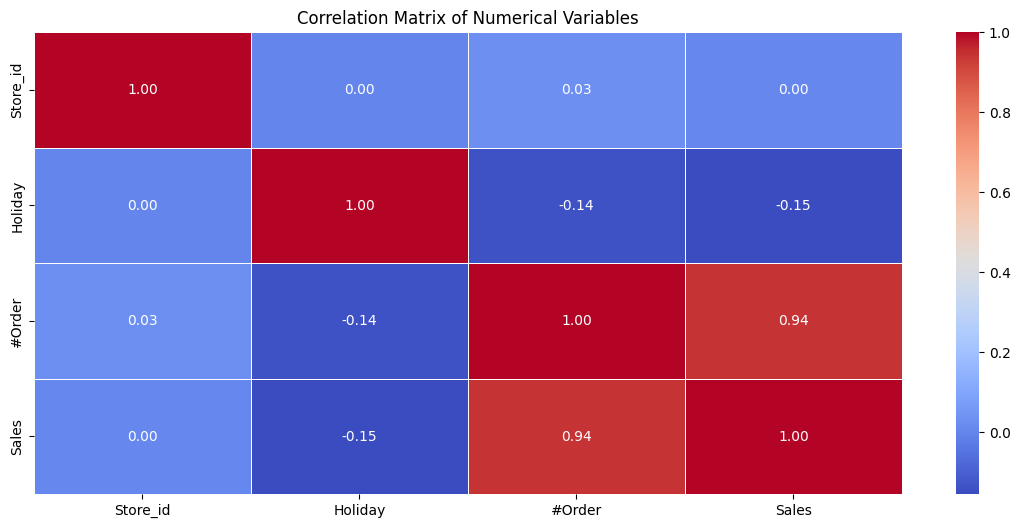

In [76]:
plt.figure(figsize=(14, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Sales and orders are highly positive correlated.

holiday vs sales vs order are negatively correlated.

#Hypothesis Testing

# Impact of Discounts on Sales:

Null Hypothesis (H₀): There is no significant difference in average sales between discount and non-discount days.

Alternative Hypothesis (H₁): Average sales are significantly higher on discount days.

In [77]:
sales_with_discount = dfp[dfp['Discount'] == 'Yes']['Sales']
sales_without_discount = dfp[dfp['Discount'] == 'No']['Sales']

In [78]:
#t-test
t_stat, p_value = ttest_ind(sales_with_discount, sales_without_discount, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 145.9295
P-value: 0.0000


In [79]:
if p_value < 0.05:
  print('Average sales are significantly higher on discount days.')
else:
  print('There is no significant difference in average sales between discount and non-discount days.')

Average sales are significantly higher on discount days.


After T-Test performed, there is a significant difference in average sales on discount days.

# Effect of Holidays on Sales:



Null Hypothesis (H₀): There is no significant difference in average sales between holidays and non-holidays.

Alternative Hypothesis (H₁): Average sales are significantly higher on holidays.

In [80]:
sales_with_holidays = dfp[dfp['Holiday'] == 'Yes']['Sales']
sales_without_holidays = dfp[dfp['Holiday'] == 'No']['Sales']

In [81]:
#t-test
t_stat, p_value = ttest_ind(sales_with_holidays, sales_without_holidays, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -66.1758
P-value: 0.0000


In [82]:
if p_value < 0.05:
  print('Average sales are significantly higher on holidays.')
else:
  print('There is no significant difference in average sales between holidays and non-holidays.')

Average sales are significantly higher on holidays.


After T-Test performed, there is a significant difference in average sales on holidays.

# Sales Differences Across Store Types

Null Hypothesis (H₀): Mean sales are equal across all store types.

Alternative Hypothesis (H₁): At least one store type has different mean sales.

In [83]:
groups = [group['Sales'].values for name, group in dfp.groupby('Store_Type')]
groups

[array([ 7011.84, 27765.  , 40401.  , ..., 42813.  , 37014.  , 50907.  ]),
 array([25482., 19248., 27093., ..., 35043., 41763., 37977.]),
 array([52944., 41241., 56439., ..., 63351., 53094., 66180.]),
 array([40557., 42729., 58017., ..., 90783., 66285., 52548.])]

In [84]:
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")


F-statistic: 35123.6441
P-value: 0.0000


In [85]:
if p_value < 0.05:
  print('At least one store type has different mean sales')
else:
  print('sales are equal across all store types.')

At least one store type has different mean sales


#Regional Sales Variability

Null Hypothesis (H₀): Median (or mean) sales are the same across all regions.

Alternative Hypothesis (H₁): Sales differ across at least one region.

In [86]:
region_groups = [group['Sales'].values for name, group in df.groupby('Region_Code')]

In [87]:
#Ensure data is normal or not
for region, group in df.groupby('Region_Code'):
    stat, p = shapiro(group['Sales'])
    print(f"Region {region} - p-value: {p:.4f}")

Region R1 - p-value: 0.0000
Region R2 - p-value: 0.0000
Region R3 - p-value: 0.0000
Region R4 - p-value: 0.0000


p-value < 0.05 in multiple regions. Hence,data is not normal.

In [88]:
#Kruskal-Wallis
h_stat, p_value = kruskal(*region_groups)
print(f"Kruskal-Wallis H-statistic: {h_stat:.4f}, P-value: {p_value:.4f}")

Kruskal-Wallis H-statistic: 3968.0636, P-value: 0.0000


In [89]:
if p_value < 0.05:
  print('Sales differ across at least one region.')
else:
  print('sales are the same across all regions.')

Sales differ across at least one region.


#Correlation between Number of Orders and Sales

Null Hypothesis (H₀): There is no correlation between #Order and Sales

Alternative Hypothesis (H₁): There is a correlation (positive or negative)

In [90]:
#Pearson Correlation

corr, p_value = pearsonr(dfp['No_of_orders'], dfp['Sales'])
print(f"Pearson correlation: {corr:.4f}, p-value: {p_value:.4f}")


Pearson correlation: 0.9416, p-value: 0.0000


P value  = 0.0000 hence there is no correlation between sales and orders

In [91]:
#Spearman Correlation

corr, p_value = spearmanr(dfp['No_of_orders'], df['Sales'])
print(f"Spearman correlation: {corr:.4f}, p-value: {p_value:.4f}")


Spearman correlation: 0.0017, p-value: 0.4599


In [92]:
if p_value < 0.05:
  print('There is a correlation (positive or negative)')
else:
  print('There is no correlation between #Order and Sales')

There is no correlation between #Order and Sales


#Data Preprocessing

In [93]:
dfp['source'] = 'train'
test['source'] = 'test'
test['Sales'] = None

combined = pd.concat([dfp, test])


In [94]:
#Convert Dates to DateTime
combined['Date'] = pd.to_datetime(combined['Date'])

In [95]:
#Encode Categorical Variables
combined = pd.get_dummies(combined, columns=['Store_Type', 'Location_Type', 'Region_Code', 'Holiday', 'Discount'], drop_first=True)

In [96]:
#Drop Unneccessary Columns
combined = combined.drop(columns=['ID','Date', 'Month','Month_Name', 'Quarter_Label', 'Month_Year', 'source','Month_Year_dt'])

In [97]:
train_data = combined[combined['Sales'].notnull()]
test_data = combined[combined['Sales'].isnull()].drop(columns='Sales')

In [98]:
#Feature Selection
X = train_data.drop(columns='Sales')
y = train_data['Sales']

In [99]:
#Train-Test Split for Validation

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Baseline Model

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print("MAE:",mae)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("RMSE:", rmse)
print("R² Score:", r2_score(y_val, y_pred))
mask = y_val != 0
mape = np.mean(np.abs((y_val[mask] - y_pred[mask]) / y_val[mask])) * 100
print("MAPE:", mape, "%")

MAE: 3635.4391803365247
RMSE: 5023.365341484252
R² Score: 0.9252522923439781
MAPE: 8.92851291240165 %


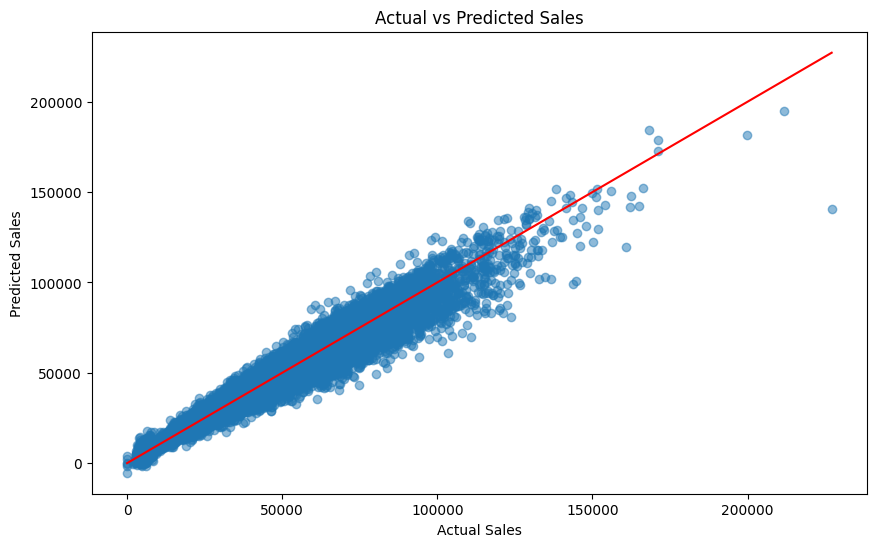

In [102]:
#Plot actual vs predicted values:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red')  # ideal line
plt.show()


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Then train your model on scaled data
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)

In [104]:
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAPE:", mape, "%")


MAE: 3635.439180336527
RMSE: 5023.365341484255
R² Score: 0.925252292343978
MAPE: inf %


In [105]:
#Set Up Cross-Validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [106]:
#Ridge Regression with Cross-Validation
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')

print("Ridge CV MSE:", -ridge_scores.mean())


Ridge CV MSE: 25404573.566218145


In [107]:
lasso = Lasso(alpha=1.0)
lasso_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')

print("Lasso CV MSE:", -lasso_scores.mean())


Lasso CV MSE: 25404513.56007483


In [108]:
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_val_scaled)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_ridge)))
print("Ridge R² Score:", r2_score(y_val, y_pred_ridge))


Ridge RMSE: 5023.364509506398
Ridge R² Score: 0.9252523171036474


In [109]:
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_val_scaled)

print("Lasso RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_lasso)))
print("Lasso R² Score:", r2_score(y_val, y_pred_lasso))


Lasso RMSE: 5023.299917785897
Lasso R² Score: 0.9252542393413796


In [110]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
grid = GridSearchCV(Lasso(), param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_)
print("Best MSE:", -grid.best_score_)


Best alpha: {'alpha': 1.0}
Best MSE: 25405070.846186318


In [111]:
final_model = Lasso(alpha=1.0)
final_model.fit(X_train_scaled, y_train)

y_pred = final_model.predict(X_val_scaled)

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("Final RMSE:", rmse)
print("Final R² Score:", r2)


Final RMSE: 5023.299917785897
Final R² Score: 0.9252542393413796


We built a baseline linear regression model to forecast sales using features such as store type, region, location, holiday, discount, and number of orders. After preprocessing the data, we evaluated multiple models including standard Linear Regression, Ridge Regression, and Lasso Regression.

Model Performance Summary:

Linear Regression

RMSE: 5023.36

R² Score: 0.925

MAPE: ∞ (likely due to zero or near-zero actual values; should be interpreted cautiously)

Ridge Regression (α=1.0)

RMSE: 5023.36

R² Score: 0.925

Lasso Regression (α=1.0)

RMSE: 5023.30

R² Score: 0.925

Key Insights:

All three models performed similarly, suggesting that the base features are strong predictors.

Lasso regression selected a simpler model by penalizing less important features, helping with model interpretability.

The chosen alpha value of 1.0 balances bias and variance well, as seen in the cross-validation results.

#Time Series Models

To check stationarity of timeseries we will use Augmanted Dickey-Duller test with 5% significance level as threshold.

In [112]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
  print('Stationary')
else:
  print('Not Stationary')



ADF Statistic: -19.50836942707848
p-value: 0.0
Stationary


Data is stationary and it is good for ARIMA.

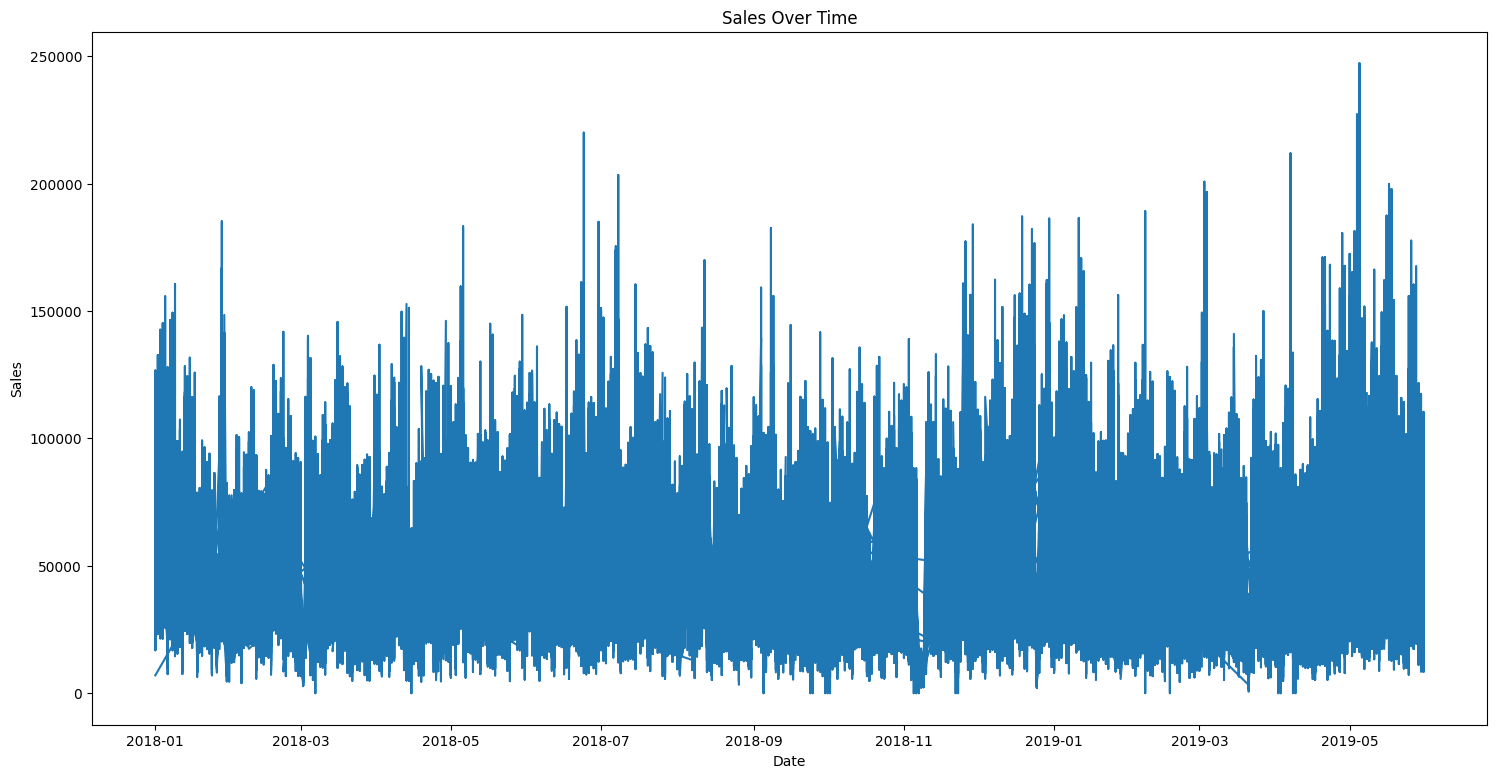

In [113]:
plt.figure(figsize=(18,9))
plt.plot(train_data.index, train_data['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


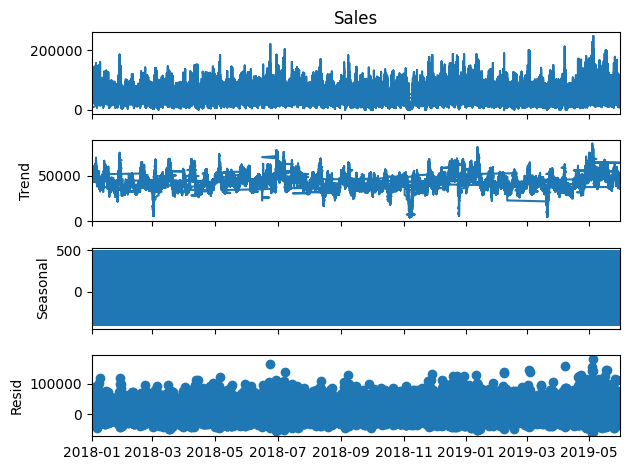

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train_data['Sales'], model='additive', period=30)
result.plot()
plt.show()


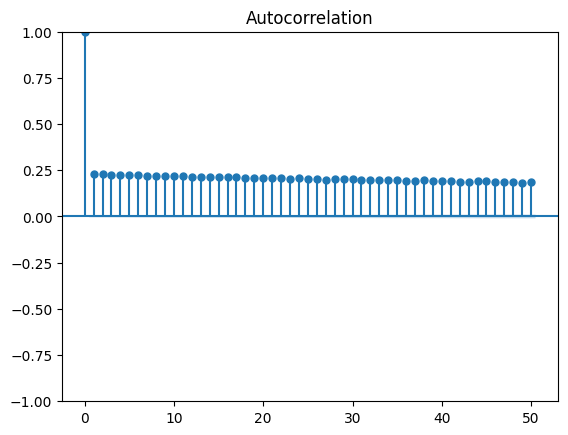

In [115]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train_data['Sales'], lags=50)
plt.show()


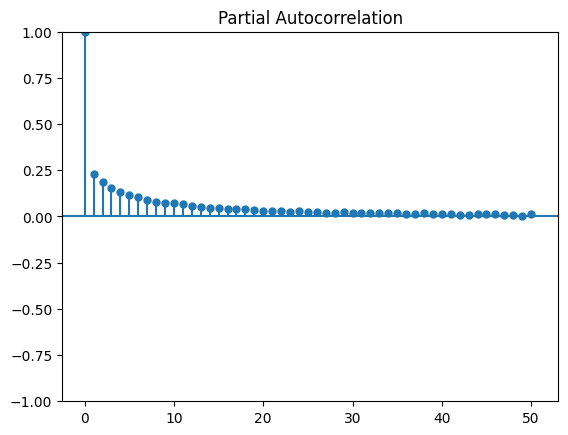

In [116]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_data['Sales'], lags=50)
plt.show()


ARIMA model: ARIMA(1, 0, 1) or ARIMA(2, 0, 2)

In [117]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data['Sales'], order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency infor

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:               188340
Model:                 ARIMA(1, 0, 1)   Log Likelihood            -2097671.491
Date:                Fri, 16 May 2025   AIC                        4195350.981
Time:                        09:43:16   BIC                        4195391.566
Sample:                             0   HQIC                       4195362.957
                             - 188340                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.278e+04    514.631     83.136      0.000    4.18e+04    4.38e+04
ar.L1          0.9958      0.000   3891.685      0.000       0.995       0.996
ma.L1         -0.9518      0.001  -1144.673      0.0

In [118]:
import warnings
import itertools
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")


p_values = [1, 2, 3]
d_values = [0]
q_values = [1, 2, 3]

# Generate all combinations of p, d, q
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# To store results
results = []

# Loop through each combination and fit ARIMA model
for pdq in pdq_combinations:
    try:
        model = ARIMA(train_data['Sales'], order=pdq)
        model_fit = model.fit()
        results.append({
            'order': pdq,
            'aic': model_fit.aic,
            'bic': model_fit.bic
        })
    except Exception as e:
        print(f"ARIMA{pdq} failed: {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='aic')

# Show top models
print("Top ARIMA models by AIC:")
print(results_df.head())


Top ARIMA models by AIC:
       order           aic           bic
8  (3, 0, 3)  4.194587e+06  4.194669e+06
5  (2, 0, 3)  4.194617e+06  4.194688e+06
2  (1, 0, 3)  4.194664e+06  4.194725e+06
7  (3, 0, 2)  4.194753e+06  4.194824e+06
4  (2, 0, 2)  4.194760e+06  4.194821e+06


Insights:
Best model is ARIMA(3, 0, 3) with the lowest AIC.

The AIC differences between the top models are small, which means other models like (2, 0, 3) or (1, 0, 3) are also strong contenders.

Split Data into Train & Test

In [119]:
train_size = int(len(train_data) * 0.8)
train, test = train_data['Sales'][:train_size], train_data['Sales'][train_size:]


Fit Model on Train Data

In [120]:
model = ARIMA(train, order=(3, 0, 3))  # best ARIMA order
model_fit = model.fit()

Forecast on Test Period

In [121]:
forecast = model_fit.forecast(steps=len(test))

Calculate Metrics

In [122]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
# mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
# print(f"MAPE: {mape:.2f}%")


MAE: 14583.57
RMSE: 19882.81


MAE: 14.5K

This means your predicted sales are off by ~14,500 units on average (in absolute terms).

If your average sales values are in the range of tens of thousands or more, this may be acceptable.

But if daily sales are lower than ~50K, this error may be significant.

RMSE: 19.8K

Since RMSE penalizes larger errors more than MAE, this shows some large deviations between forecast and actuals.

The fact that RMSE > MAE confirms the presence of a few large prediction errors.

In [123]:
import pickle

with open('final_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [124]:
# # Load the model from the file
# with open('model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)